<a href="https://colab.research.google.com/github/commitit/Stock-Prediction/blob/main/stock_predictionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the stock price movement of American Express.

* We are using the stock data for American Express from the year 1972 to 2020 and try to predict the closing price for the date... to date..

* Closing Price is the last price at which a stock trades during a regular trading session.

# Importing required libraries

In [241]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import tensorflow as tf

import datetime

# Data Exploration

In [242]:
df = pd.read_csv("https://raw.githubusercontent.com/commitit/Stock-Prediction/main/AXP.csv")

In [243]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,3.693287,3.693287,3.693287,3.693287,0.406085,0.0
1,1972-06-02,3.677195,3.677195,3.677195,3.677195,0.404316,0.0
2,1972-06-05,3.604777,3.604777,3.604777,3.604777,0.396353,0.0
3,1972-06-06,3.411664,3.411664,3.411664,3.411664,0.375120,0.0
4,1972-06-07,3.371432,3.371432,3.371432,3.371432,0.370696,0.0
5,1972-06-08,3.451896,3.451896,3.451896,3.451896,0.379544,0.0
6,1972-06-09,3.427757,3.427757,3.427757,3.427757,0.376890,0.0
7,1972-06-12,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
8,1972-06-13,3.484082,3.484082,3.484082,3.484082,0.383082,0.0
9,1972-06-14,3.443850,3.443850,3.443850,3.443850,0.378659,0.0


In [244]:
# We take a look at the last rows of our dataset
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
12059,2020-03-26,92.239998,99.690002,90.839996,93.290001,92.774651,9459400.0
12060,2020-03-27,87.940002,91.970001,85.820000,88.730003,88.239845,6999800.0
12061,2020-03-30,88.510002,91.389999,85.269997,90.269997,89.771332,5565000.0
12062,2020-03-31,89.940002,90.900002,85.070000,85.610001,85.137077,6075900.0
12063,2020-04-01,80.650002,81.309998,77.000000,77.839996,77.409996,8307600.0


In [245]:
# We check the datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12064 non-null  object 
 1   Open       12064 non-null  float64
 2   High       12064 non-null  float64
 3   Low        12064 non-null  float64
 4   Close      12064 non-null  float64
 5   Adj Close  12064 non-null  float64
 6   Volume     12064 non-null  float64
dtypes: float64(6), object(1)
memory usage: 659.9+ KB


In [246]:
df["Date"] = pd.to_datetime(df["Date"])
df.index = df.pop("Date")

In [247]:
df = df[["Close"]]

In [248]:
df.head()

,Close
Date,
1972-06-01,3.693287
1972-06-02,3.677195
1972-06-05,3.604777
1972-06-06,3.411664
1972-06-07,3.371432


In [249]:
df.describe()

,Close
count,12064.000000
mean,29.681398
std,30.876242
min,1.134539
25%,4.747363
50%,13.038323
75%,47.703850
max,136.929993


# Data Visualization

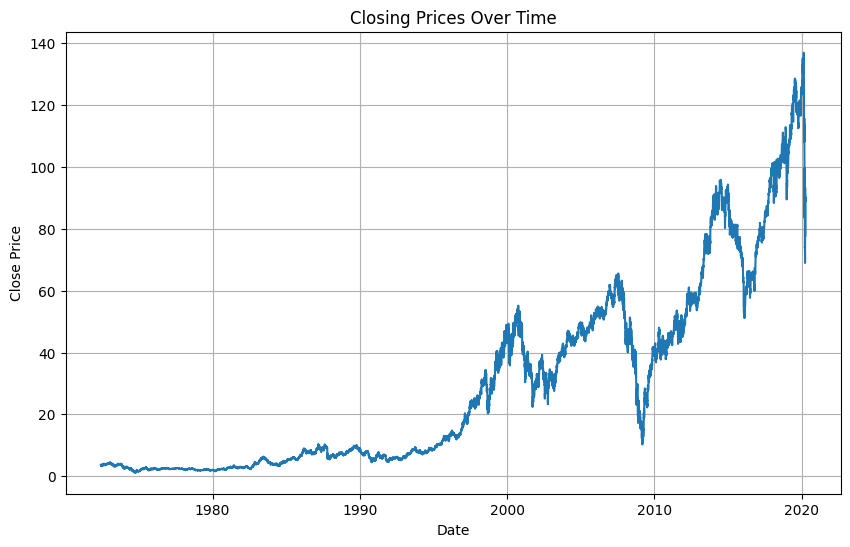

In [250]:
#Visualizing the closing price from 1972 until 2020
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Data Preparation

###Spliting the data to Training and Test data
####Importing MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and

In [251]:
#For preprocessing
from sklearn.preprocessing import MinMaxScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse

In [252]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))
df1

array([[0.01884266],
       [0.01872416],
       [0.01819087],
       ...,
       [0.65639501],
       [0.62207872],
       [0.56486027]])

In [253]:
len(df1), len(df)

(12064, 12064)

In [254]:
#To see the scaled data in a DF format, we create a new DF using the scaled values.
#Create a new DataFrame with the scaled values and original dates in the index
scaled_df = pd.DataFrame(df1, index = df.index, columns = ["Scaled_Close"])
scaled_df.head()

,Scaled_Close
Date,
1972-06-01,0.018843
1972-06-02,0.018724
1972-06-05,0.018191
1972-06-06,0.016769
1972-06-07,0.016473


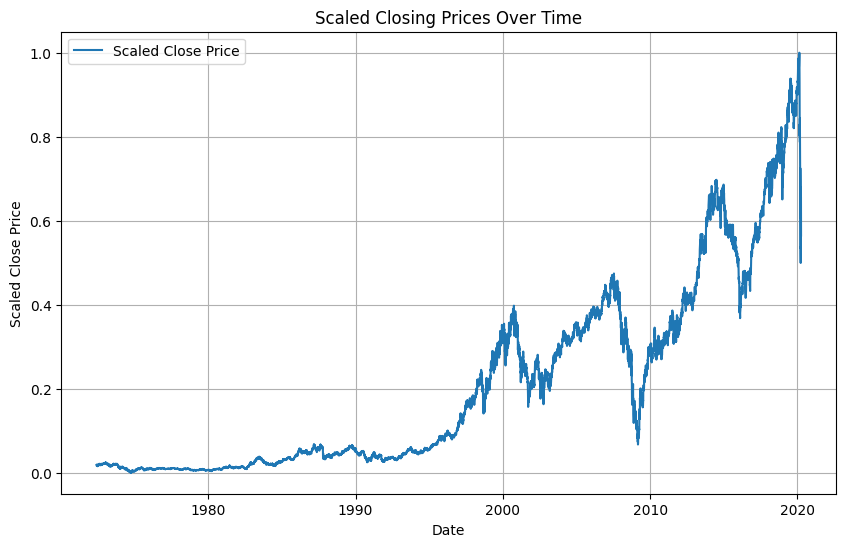

In [255]:
plt.figure(figsize=(10, 6))
plt.plot(scaled_df.index, scaled_df["Scaled_Close"], label="Scaled Close Price")
plt.title('Scaled Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [256]:
#Splitting dataset into train and test sets.
#Determining Training Size: 80% of the total dataset length
training_size = int(len(df1)*0.8)

#Determining Test Size: remaining 20% of the total dataset length
test_size = len(df1)-training_size

In [257]:
#Inspecting the sizes of our training and test sets
print ("Training Size: ", training_size)
print ("Training Size: ", test_size)

Training Size:  9651
Training Size:  2413


In [258]:
# Splitting Dataset: train_data contains the first training_size rows of the scaled data, and test_data contains the remaining rows.
train_data,test_data=df1[0:training_size,:], df1[training_size:len(df1),:1]

In [259]:
#Checking the  length (number of rows) in our training and test set

print("Length of Training Data:", len(train_data))
print("Length of Test Data:", len(test_data))


Length of Training Data: 9651
Length of Test Data: 2413


In [260]:
#Inspecting the train data as NumPy array
train_data

array([[0.01884266],
       [0.01872416],
       [0.01819087],
       ...,
       [0.28421762],
       [0.29290716],
       [0.28539586]])

In [261]:
# Convert the data to numpy array and set the timestep to 100
# converts a time series data array into input-output pairs suitable for an autoregressive (AR) model.

"""Convert a time series array into input-output pairs for an autoregressive model.

    Parameters:
    - stock_data (numpy.ndarray): The time series data.
    - time_step (int): The number of time steps to use for each input sequence.

    Returns:
    - tuple: A tuple containing NumPy arrays (X, Y), where X is the input sequence matrix and Y is the target values array. X[120,130,140,150] : Y[200]; timestep 100 means that it takes 100 records as one input; goal is to predict"""
#def create_AR(stock_data, time_step):
#	X, Y = [], []
#	for i in range(time_step, len(stock_data)):
#		a = stock_data[i-time_step:i, 0]
#		X.append(a)
#		Y.append(stock_data[i,0])
#	return np.array(X), np.array(Y)

'Convert a time series array into input-output pairs for an autoregressive model.\n\n    Parameters:\n    - stock_data (numpy.ndarray): The time series data.\n    - time_step (int): The number of time steps to use for each input sequence.\n\n    Returns:\n    - tuple: A tuple containing NumPy arrays (X, Y), where X is the input sequence matrix and Y is the target values array. X[120,130,140,150] : Y[200]; timestep 100 means that it takes 100 records as one input; goal is to predict'

In [262]:
def create_AR(stock_data, time_step):
	X, Y = [], []
	for i in range(len(stock_data)-time_step-1):
		a = stock_data[i:(i+time_step), 0]
		X.append(a)
		Y.append(stock_data[i+time_step,0])
	return np.array(X), np.array(Y)

In [263]:
#applying the create_AR function to create input-output pairs for your training and test sets with a specified time step.
time_step = 100
#using create_AR function to create input sequences (X_train) and target values (y_train) for the train_data with the specified time step.
X_train, y_train = create_AR(train_data, time_step)
#Similarly, using the create_AR function to create input sequences (X_test) and target values (y_test) for the test_data with the specified time step.
X_test, y_test = create_AR(test_data, time_step)

#X_train and X_test should contain sequences of 100 time steps each, and y_train and y_test should contain the corresponding target values.

In [264]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (9550, 100)
Shape of y_train: (9550,)


In [265]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (2312, 100)
Shape of y_test: (2312,)


In [266]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Build the Model
* Add LSTM layer along with dropout layers to prevent overfitting. After that, we add a Dense layer that specifies a one unit output. Next, we compile the model using the adam optimizer and set the loss as the mean_squarred_error

In [291]:
#Model

### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics = ["mean_absolute_error"])

modelresult = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100, batch_size=64,verbose=1)


Epoch 1/100
150/150 [==============================] - 11s 25ms/step - loss: 0.0014 - mean_absolute_error: 0.0196 - val_loss: 0.0025 - val_mean_absolute_error: 0.0416
Epoch 2/100
150/150 [==============================] - 2s 16ms/step - loss: 3.4706e-04 - mean_absolute_error: 0.0110 - val_loss: 0.0020 - val_mean_absolute_error: 0.0348
Epoch 3/100
150/150 [==============================] - 2s 15ms/step - loss: 3.1693e-04 - mean_absolute_error: 0.0105 - val_loss: 0.0011 - val_mean_absolute_error: 0.0236
Epoch 4/100
150/150 [==============================] - 2s 16ms/step - loss: 2.7855e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0021 - val_mean_absolute_error: 0.0369
Epoch 5/100
150/150 [==============================] - 3s 20ms/step - loss: 2.6077e-04 - mean_absolute_error: 0.0098 - val_loss: 0.0012 - val_mean_absolute_error: 0.0269
Epoch 6/100
150/150 [==============================] - 3s 22ms/step - loss: 2.7475e-04 - mean_absolute_error: 0.0107 - val_loss: 7.6836e-04 - val_mean_ab

In [268]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_9 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_10 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

# Model Evaluation

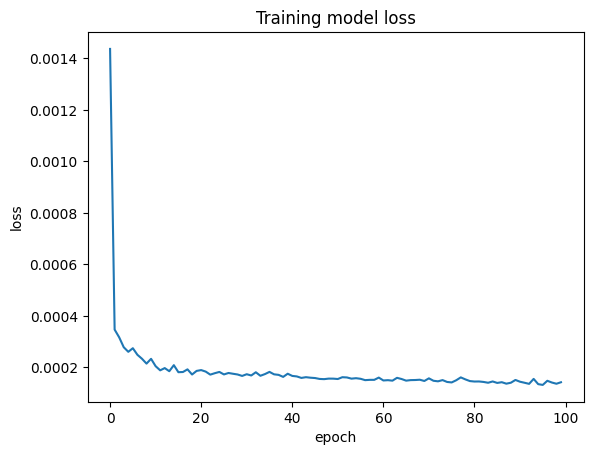

In [292]:
plt.plot(modelresult.history["loss"])
plt.title('Training model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [348]:
#predicted stock price on train and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

73/73 [==============================] - 0s 6ms/step


In [349]:
#Inverse transform to get actual value
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

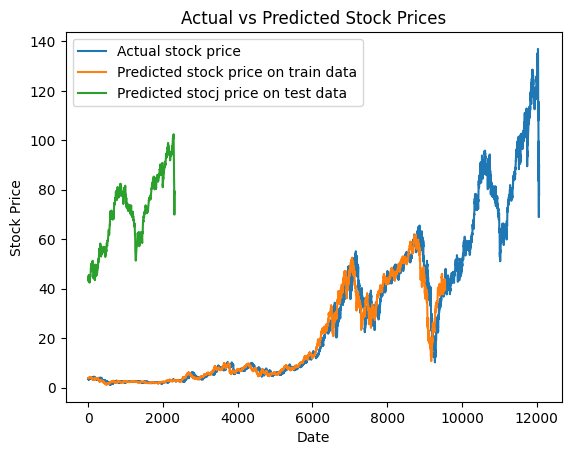

In [350]:
plt.plot(scaler.inverse_transform(df1), label = "Actual stock price")
plt.plot(train_pred, label = "Predicted stock price on train data")
plt.plot(test_pred, label = "Predicted stocj price on test data")

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [351]:
#appending train and test pred
test = np.vstack((train_pred, test_pred))

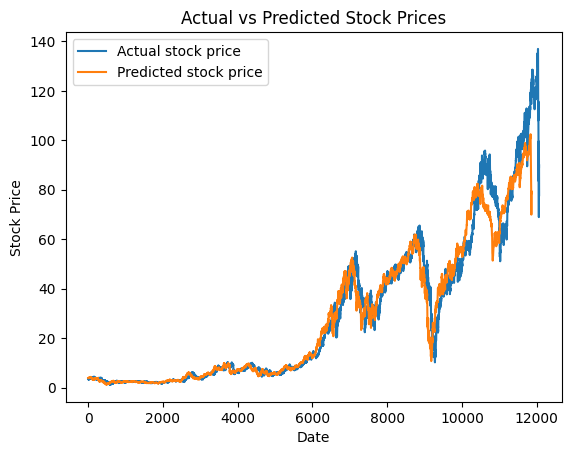

In [352]:
#Combining the predicted data to create uniform data visualization
plt.plot(scaler.inverse_transform(df1), label = "Actual stock price")
plt.plot(test, label = "Predicted stock price")

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

# Forecasting Stock price for the next 30 days

In [353]:
len(test_data)

2413

In [355]:
#Getting the last 100 days
fut_inp = test_data[2313:]

In [356]:
fut_inp = fut_inp.reshape(1,-1)

In [357]:
tmp_inp = list(fut_inp)

In [358]:
fut_inp.shape

(1, 100)

In [359]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [360]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[[0.5412071943283081], [0.5243299603462219], [0.5118549466133118], [0.5023227334022522], [0.4937979578971863], [0.48583775758743286], [0.47866201400756836], [0.4724588990211487], [0.46716850996017456], [0.4625769257545471], [0.45845305919647217], [0.45461583137512207], [0.45094114542007446], [0.4473465085029602], [0.4437776803970337], [0.44020235538482666], [0.43660616874694824], [0.43298953771591187], [0.4293630123138428], [0.4257432222366333], [0.4221486449241638], [0.4185972809791565], [0.4151045083999634], [0.4116823673248291], [0.40833932161331177], [0.4050799608230591], [0.40190595388412476], [0.39881622791290283], [0.39580774307250977], [0.39287620782852173]]


In [362]:
len(df1)

12064

In [363]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

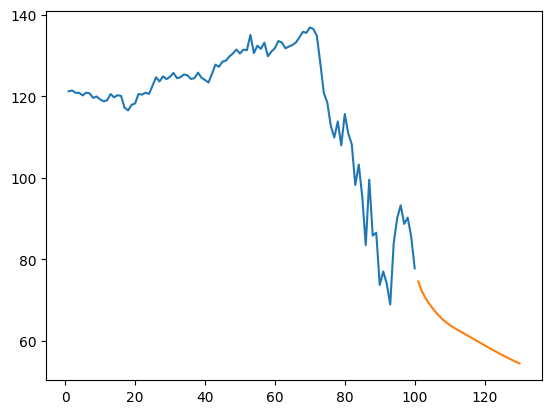

In [367]:
plt.plot(plot_new, scaler.inverse_transform(df1[11964:]))
plt.plot(plot_pred, scaler.inverse_transform(lst_output))

In [368]:
ds_new = df1.tolist()

In [369]:
len(ds_new)

12064

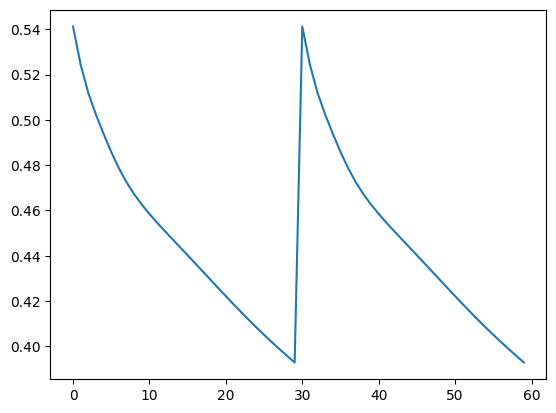

In [371]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[12064:])

In [372]:
#Creating final data for plotting
final_graph = scaler.inverse_transform(ds_new).tolist()

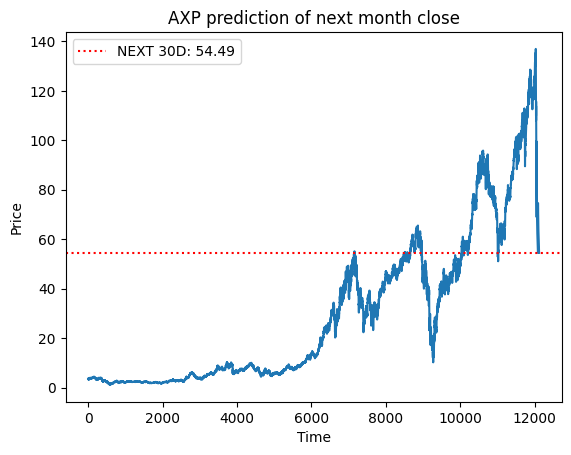

In [376]:
#Plotting final results with predicted value after 30 Days

stock_symbol = "AXP"
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month close".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

In [336]:
print(train_pred[:5])
print(test_pred[:5])

[[3.9354777]
 [3.954005 ]
 [3.9451957]
 [3.9273381]
 [3.9118056]]
[[44.53606 ]
 [44.712147]
 [44.340336]
 [43.90023 ]
 [43.748913]]


In [344]:
test_pred

array([[44.53606 ],
       [44.712147],
       [44.340336],
       ...,
       [79.48984 ],
       [78.218636],
       [78.63625 ]], dtype=float32)

In [341]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

24.34347902691696

In [342]:
math.sqrt(mean_squared_error(y_test,test_pred))

72.20746794947758

In [324]:
# Evaluate Performance metrics
# Calculate and print additional performance metrics such as RMSE, Mean Absolute Error (MAE), or others, depending on your preference.

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate performance metrics
train_rmse = mean_squared_error(y_train, train_pred, squared=False)
test_rmse = mean_squared_error(y_test, test_pred, squared=False)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

print("Train RMSE: %.2f" % train_rmse)
print("Test RMSE: %.2f" % test_rmse)
print("Train MAE: %.2f" % train_mae)
print("Test MAE: %.2f" % test_mae)


Train RMSE: 24.34
Test RMSE: 72.21
Train MAE: 17.17
Test MAE: 70.72
